<h1>Lesson 5. Model selection: US Salary Prediction</h1>

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/White_House_lawn_%281%29.tif/lossy-page1-2433px-White_House_lawn_%281%29.tif.jpg style="height:300px;">
  
<p>In this exercise you will use the US Adult Census data relating income to social factors such as Age, Education, race etc...</p>

<p>The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset.</p>


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split


train=pd.read_csv('census-training.csv')
print(train.info())
train.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
Age              48842 non-null int64
EducationNum     48842 non-null int64
MaritalStatus    48842 non-null object
Occupation       48842 non-null object
Relationship     48842 non-null object
Race             48842 non-null object
Gender           48842 non-null object
Hours/Week       48842 non-null int64
Country          48842 non-null object
Income           48842 non-null object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None


,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K.
5,34,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K.
6,29,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K.
7,63,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K.
8,24,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K.
9,55,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K.


<h3>Q.1. Write a command that will calculate the number of unique values for each feature in the training data.</h3>

In [2]:
train.nunique()

Age              74
EducationNum     16
MaritalStatus     7
Occupation       15
Relationship      6
Race              5
Gender            2
Hours/Week       96
Country          42
Income            4
dtype: int64

<h3>Q.2. There is a special character '?' inserted in the data in place of null values.  Write a command that will remove it and replace with NaN.</h3>

In [3]:
# Command (s): remove the '?' special character and replace with NaN
train = train.replace('?', np.NaN)

train.isnull().sum() #checking the dataset for NaN values .... NaN values in two columns

Age                 0
EducationNum        0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
Gender              0
Hours/Week          0
Country           857
Income              0
dtype: int64

<h3>Q.3. Replace all missing values in Occupation and Country by their mode (most occuring values). </h3>

In [4]:
# replace missing values with their mode
train['Occupation'] = train['Occupation'].fillna(train['Occupation'].mode()[0])
train['Country'] = train['Country'].fillna(train['Country'].mode()[0])
train.isnull().sum() #checking the data for NaN values all show 0 now

Age              0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
Hours/Week       0
Country          0
Income           0
dtype: int64

<h3>Q.4. Write functions to replace Gender and Income attributes to "0" and "1". </h3>

In [5]:
def gender_to_numeric(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 0

# Apply the function to the `Gender` variable
train['Gender'] = train['Gender'].apply(gender_to_numeric)


def income_to_numeric(x):
    if x== '<=50K.':
        return 1
    else:
        return 0

# Apply the function to the `income` variable
train['Income'] = train['Income'].apply(income_to_numeric)


<h3>Q.5. Use the label encoder API to encode all object-type in the data. </h3>

In [6]:
# Command(s) 
obj = train.select_dtypes(include=['object']) #all features that are 'object' datatypes
le = preprocessing.LabelEncoder()
for i in range(len(obj.columns)):
    train[obj.columns[i]] = le.fit_transform(train[obj.columns[i]]) #Encode input data

train.head(10) #Inspect the data, all features should be numeric now

,Age,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,Hours/Week,Country,Income
0,25,7,4,6,3,2,1,40,38,1
1,38,9,2,4,0,4,1,50,38,1
2,28,12,2,10,0,4,1,40,38,0
3,44,10,2,6,0,2,1,40,38,0
4,18,10,4,9,3,4,0,30,38,1
5,34,6,4,7,1,4,1,30,38,1
6,29,9,4,9,4,2,1,40,38,1
7,63,15,2,9,0,4,1,32,38,0
8,24,10,4,7,4,4,0,40,38,1
9,55,4,2,2,0,4,1,10,38,1


<h3>Q.6. Split the data into 70% training and 30% test </h3>

In [7]:
X = train.iloc[:,:8]
y = train.iloc[:,9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3>Q.7. Train the logistic regression model on the train dataset and evaluate its performance on the test dataset.</p>

In [8]:
# Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
log_rgr = LogisticRegression()

# TODO: fit X_train and y_train
log_rgr.fit(X_train, y_train) 
#predict on the test set
y_pred = log_rgr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7425783116085444
AUC: 0.49990302252754376


<h3>Q.8. Train the KNN classifier (with k=15) on the train dataset and evaluate its performance on the test dataset. Compare your results with the one above</p>

Accuracy: 0.732955708728588
AUC: 0.5097374037783545


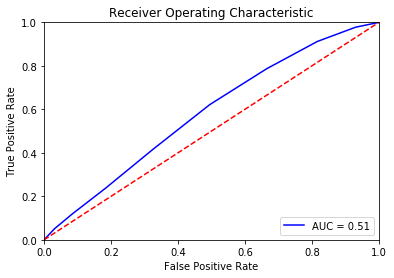

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
knn = KNeighborsClassifier(15)
# fit X_train and y_train
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)#Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: {}".format(knn_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Compare results
# Increase in AUC  but decrease in Accuracy.

<h3>Q.9. Perform recursive feature elimination (5 features) on the dataset using the logistic regression classifier. Any difference in the results? Explain.</h3>

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.742441820787552
AUC: 0.5003317226905099


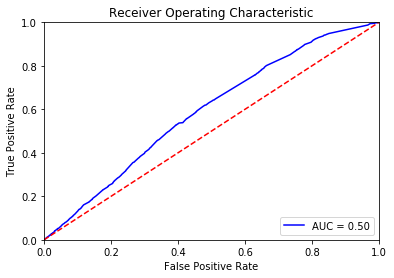

In [10]:
from sklearn.feature_selection import RFE

clf = LogisticRegression()
rfe =  RFE(clf, 5, step=1)
rfe.fit(X_train, y_train) # fit X_train and y_train

y_pred = rfe.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred) #Compute the accuracy score
# calculate the fpr and tpr for all thresholds of the classification
probs = rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Compare results
# There is an increase in the accuracy from .73 to .74 and the AUC is similar to the other models.